<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Isolation_Forest_Univariate_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
target = '/content/Electric_Production.csv'
df = pd.read_csv(target)

<Axes: >

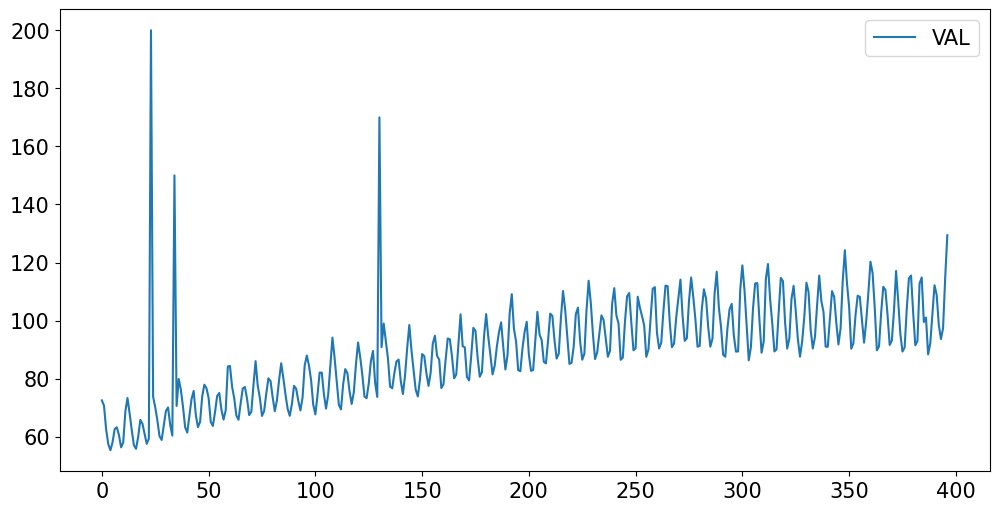

In [3]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
df.plot()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [5]:
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df['VAL'].values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

In [6]:
df['anomaly'] = model.predict(data)

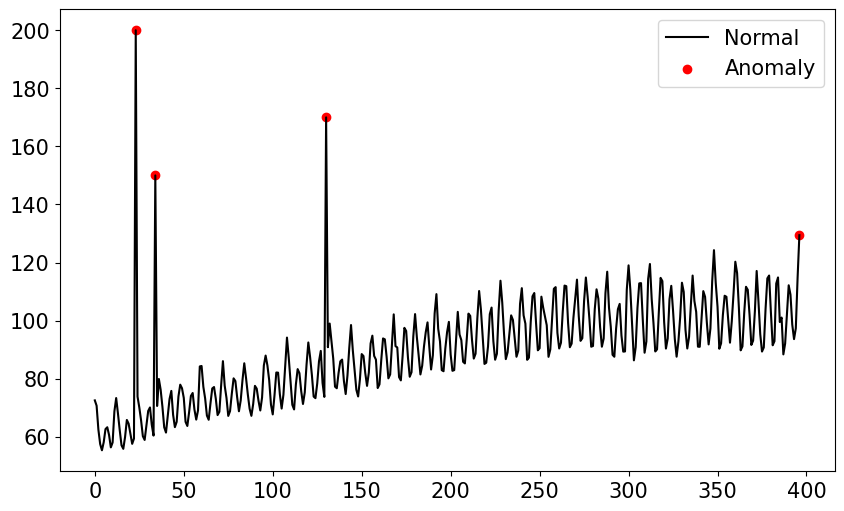

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly'] == -1, ['VAL']] #anomaly
ax.plot(df.index, df['VAL'], color='black', label = 'Normal')
ax.scatter(a.index,a['VAL'], color='red', label = 'Anomaly')
plt.legend()
plt.show();